### Download the dataset
#### I have taken subset of following dataset
#### Dataset credits: https://www.kaggle.com/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten


In [1]:
# !pip install gdown 
# import gdown

# url="https://drive.google.com/file/d/1WHT4GWMj8YnEwPwPgVehcwx8Xk0jHQcQ/view?usp=drive_link"
# output="data.zip"

# gdown.download(url=url, output=output, fuzzy=True)

In [2]:
# !ls 
# !unzip "data.zip" -d "data"

In [3]:
# pip install split-folders

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models,layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2

import os
import glob
import shutil
import matplotlib.pyplot as plt
import numpy as np
import splitfolders 

from IPython.display import HTML

2025-03-14 11:55:24.648628: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741971325.039240   42286 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741971325.202316   42286 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-14 11:55:26.038566: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
print(tf.__version__)

2.18.0


In [6]:
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
BATCH_SIZE=32
IMAGE_SIZE=(256,256)
CHANNELS=3
EPOCHS=15

In [8]:
#Parameters
directory = "data/fruits/apple"
interpolation='bilinear'

In [9]:
# splitfolders.ratio(directory, seed=41, ratio=(.8, .1, .1), group_prefix=None)

In [10]:
# !ls data/fruits/apple
# !ls /output/
!ls "data/fruits/apple"

Apple__Healthy	Apple__Rotten


In [11]:
train_dir="output/train"
test_dir="output/test"
val_dir="output/val"

In [12]:
class_names = os.listdir(test_dir) 
class_names

['Apple__Healthy', 'Apple__Rotten']

In [13]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE
)

Found 4290 files belonging to 2 classes.


I0000 00:00:1741971369.956373   42286 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79078 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:81:00.0, compute capability: 8.0


Found 536 files belonging to 2 classes.
Found 537 files belonging to 2 classes.


In [14]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(*IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [16]:
input_shape = (BATCH_SIZE, *IMAGE_SIZE, CHANNELS)
n_classes = 2

import tensorflow as tf
from tensorflow.keras import layers, models

input_shape = (BATCH_SIZE, *IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(), 
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

/home/snayak/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (32, 254, 254, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (32, 125, 125, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (32, 60, 60, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 57600)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 128)              │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (32, 128)              │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 2)                │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,430,658 (28.35 MB)

 Trainable params: 7,430,082 (28.34 MB)

 Non-trainable params: 576 (2.25 KB)

In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) 
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [19]:
class_weights = {0: 1.2, 1: 1.0}  

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=15,
    class_weight=class_weights
)

Epoch 1/15


2025-03-14 11:56:25.103644: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:22: Filling up shuffle buffer (this may take a while): 58 of 1000
2025-03-14 11:56:31.397723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-14 11:56:38.453494: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
I0000 00:00:1741971398.456875   44041 service.cc:148] XLA service 0x2aada4004830 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741971398.457017   44041 service.cc:156]   StreamExecutor device (0): NVIDIA A100 80GB PCIe, Compute Capability 8.0
2025-03-14 11:56:38.510356: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741971398.777444   44041 cuda_dnn.cc:529] Loaded cuDNN version 90300


 12/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5909 - loss: 2.4131

I0000 00:00:1741971406.004573   44041 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


135/135 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.8039 - loss: 0.8928 - val_accuracy: 0.4534 - val_loss: 1.5676
Epoch 2/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9347 - loss: 0.1996 - val_accuracy: 0.4571 - val_loss: 1.4751
Epoch 3/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9581 - loss: 0.1362 - val_accuracy: 0.8545 - val_loss: 0.3282
Epoch 4/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9513 - loss: 0.1388 - val_accuracy: 0.8153 - val_loss: 0.4758
Epoch 5/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9607 - loss: 0.1153 - val_accuracy: 0.9310 - val_loss: 0.1743
Epoch 6/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9821 - loss: 0.0611 - val_accuracy: 0.9571 - val_loss: 0.1260
Epoch 7/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9869 - loss: 0.0434 - val_accuracy: 0.9216 - val_loss: 0.1953
Epoch 8/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9953 - loss: 0.0222 - val_accuracy: 0.98

In [20]:
loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.9472 - loss: 0.1526
Test Accuracy: 0.9534
Test Loss: 0.1372


In [21]:
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    pred_labels = np.argmax(predictions, axis=1)
    print("Predicted labels:", pred_labels)
    print("True labels:", labels.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
Predicted labels: [0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0]
True labels: [0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0]


2025-03-14 11:57:15.814029: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [22]:
acc, loss = history.history['accuracy'], history.history['loss']
val_acc, val_loss = history.history['val_accuracy'], history.history['val_loss']

Text(0.5, 1.0, 'training and validation loss')

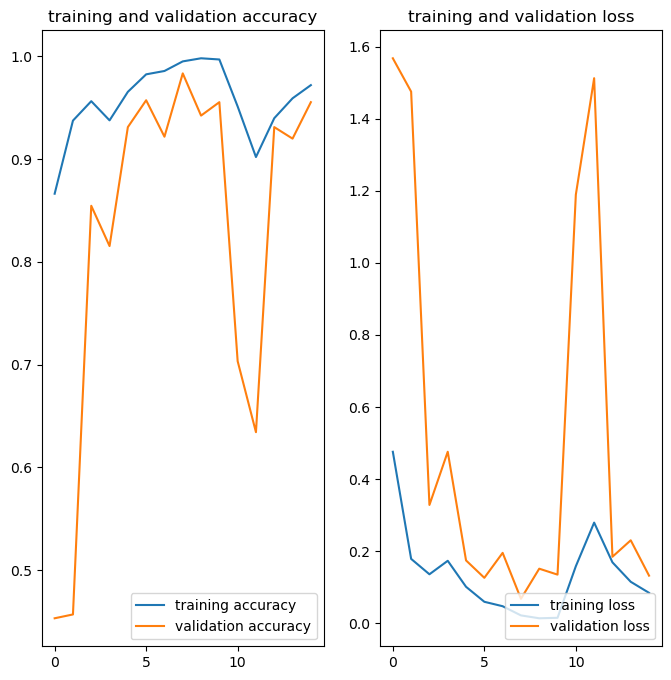

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='training accuracy')
plt.plot(range(EPOCHS),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='training loss')
plt.plot(range(EPOCHS),val_loss,label='validation loss')
plt.legend(loc='lower right')
plt.title('training and validation loss')

In [24]:
def predict(img_path, model):
    img = image.load_img(img_path)
    # Add batch dimension
    img_array = np.expand_dims(img, axis=0)  
    pred = model(img_array,training=False)
    pred_label = class_names[int(np.argmax(pred, axis=1))]  # Get class label

    return pred_label

/scratch/local/ipykernel_42286/771254246.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label = class_names[int(np.argmax(pred, axis=1))]  # Get class label


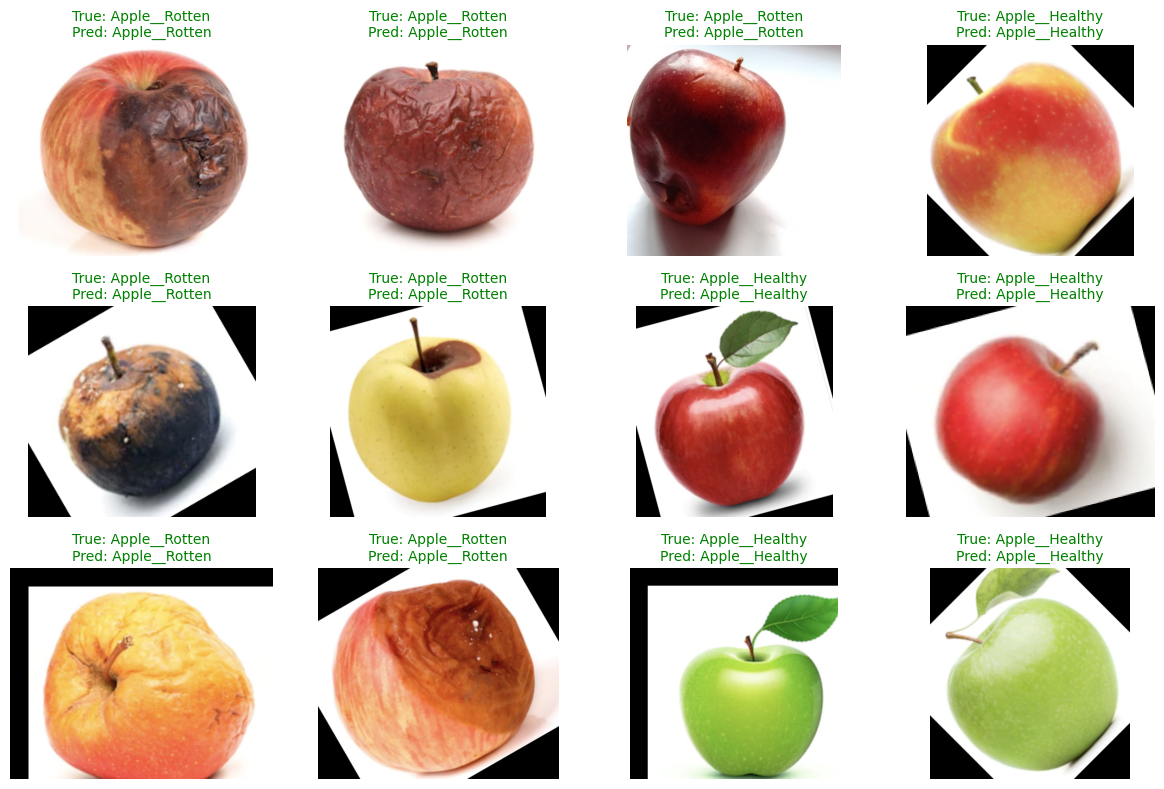

In [31]:
# Get all image paths from test directory
image_paths = []
true_labels = []

for class_name in class_names:
    class_dir = os.path.join(test_dir, class_name)
    for img_name in os.listdir(class_dir):
        image_paths.append(os.path.join(class_dir, img_name))
        true_labels.append(class_name)

# Select 12 random images for visualization
num_images = 12
random_indices = np.random.choice(len(image_paths), num_images, replace=False)
selected_images = [image_paths[i] for i in random_indices]
selected_labels = [true_labels[i] for i in random_indices]

# Function to predict and visualize
def predict_and_visualize(model, img_paths, true_labels):
    plt.figure(figsize=(12, 8))

    for i, img_path in enumerate(img_paths):
        img = image.load_img(img_path)
        pred_label = predict(img_path,model)
        
        # Display image with prediction
        plt.subplot(3, 4, i + 1)
        plt.imshow(np.array(img).astype("uint8")) 
        plt.title(f"True: {true_labels[i]}\nPred: {pred_label}", fontsize=10, 
                  color="green" if true_labels[i] == pred_label else "red")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

predict_and_visualize(model, selected_images, selected_labels)


In [34]:
models_dir = "models/apple_model"

os.makedirs(models_dir, exist_ok=True)
existing_versions =[int(i) for i in os.listdir(models_dir) if i.isdigit()]
model_version = max(existing_versions) + 1 if existing_versions else 1
model_export_path = f"{models_dir}/{model_version}"

model.trainable=False
model.export(model_export_path)
# model.save(f"{models_dir}/{model_version}.keras")

print(f"Model saved as: {models_dir}/{model_version}")

INFO:tensorflow:Assets written to: models/apple_model/1/assets


INFO:tensorflow:Assets written to: models/apple_model/1/assets


Saved artifact at 'models/apple_model/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  46914901617808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  46914901617616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  46916745367952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  46916745368912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  46914901618192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  46914901618000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  46916745368336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  46916745367760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  46916745370256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  46916745369872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  46916745370064: Tens